# 1. 1D Laplace equation:

Using backend: tensorflow.compat.v1



Instructions for updating:
non-resource variables are not supported in the long term

Compiling model...
Building feed-forward neural network...
'build' took 0.044433 s



/Users/raj/opt/anaconda3/lib/python3.8/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:114: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(
/Users/raj/opt/anaconda3/lib/python3.8/site-packages/keras/legacy_tf_layers/core.py:255: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)


'compile' took 0.255013 s

Initializing variables...
Training model...

Step      Train loss              Test loss               Test metric   
0         [4.33e+01, 1.10e-04]    [4.90e+01, 1.10e-04]    [9.91e-01]    
1000      [4.31e-04, 5.87e-07]    [5.95e-04, 5.87e-07]    [6.76e-04]    
2000      [1.08e-03, 2.78e-05]    [9.49e-04, 2.78e-05]    [4.37e-03]    
3000      [3.04e-03, 8.05e-05]    [2.68e-03, 8.05e-05]    [7.59e-03]    
4000      [3.03e-05, 4.01e-08]    [9.24e-05, 4.01e-08]    [1.56e-04]    
5000      [2.63e-05, 4.23e-08]    [8.87e-05, 4.23e-08]    [2.28e-04]    
6000      [8.17e-04, 1.63e-05]    [1.02e-03, 1.63e-05]    [3.72e-03]    
7000      [2.17e-05, 1.42e-08]    [7.27e-05, 1.42e-08]    [1.80e-04]    
8000      [3.59e-04, 6.06e-06]    [3.24e-04, 6.06e-06]    [1.98e-03]    
9000      [2.34e-05, 2.48e-07]    [8.14e-05, 2.48e-07]    [3.75e-04]    
10000     [2.36e-04, 4.79e-06]    [3.40e-04, 4.79e-06]    [2.06e-03]    

Best model at step 7000:
  train loss: 2.17e-05
  t

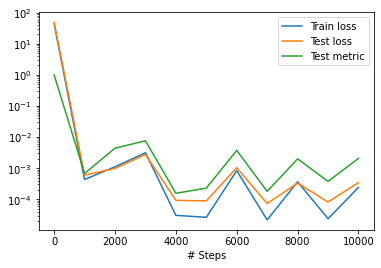

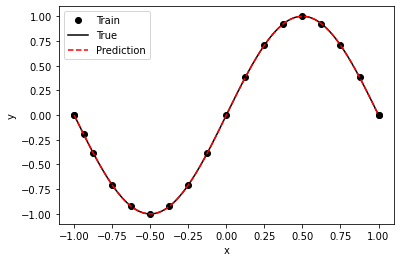

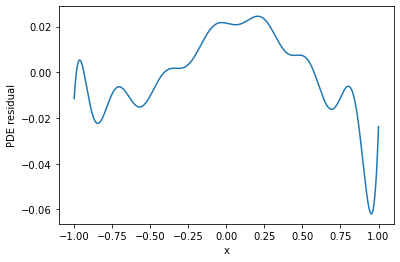

In [1]:
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
# Import tf if using backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf
#Import torch if using backend pytorch
#import torch


def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    return -dy_xx - np.pi ** 2 * tf.sin(np.pi * x)
    # Use torch.sin for backend pytorch
    # return -dy_xx - np.pi ** 2 * torch.sin(np.pi * x)
    # Use paddle.sin for backend paddle
    # return -dy_xx - np.pi ** 2 * paddle.sin(np.pi * x)


def boundary(x, on_boundary):
    return on_boundary


def func(x):
    return np.sin(np.pi * x)


geom = dde.geometry.Interval(-1, 1)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 16, 2, solution=func, num_test=100)

layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])

losshistory, train_state = model.train(iterations=10000)
# Optional: Save the model during training.
# checkpointer = dde.callbacks.ModelCheckpoint(
#     "model/model", verbose=1, save_better_only=True
# )
# Optional: Save the movie of the network solution during training.
# ImageMagick (https://imagemagick.org/) is required to generate the movie.
# movie = dde.callbacks.MovieDumper(
#     "model/movie", [-1], [1], period=100, save_spectrum=True, y_reference=func
# )
# losshistory, train_state = model.train(iterations=10000, callbacks=[checkpointer, movie])

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

# Optional: Restore the saved model with the smallest training loss
# model.restore(f"model/model-{train_state.best_step}.ckpt", verbose=1)
# Plot PDE residual
x = geom.uniform_points(1000, True)
y = model.predict(x, operator=pde)
plt.figure()
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("PDE residual")
plt.show()

# 2. 1+1D Diffsion equation

Compiling model...
Building feed-forward neural network...
'build' took 0.039185 s



/Users/raj/opt/anaconda3/lib/python3.8/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:114: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(
/Users/raj/opt/anaconda3/lib/python3.8/site-packages/keras/legacy_tf_layers/core.py:255: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)


'compile' took 0.354367 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric   
0         [1.66e+01, 2.29e-01, 8.43e-01]    [1.80e+01, 2.29e-01, 8.43e-01]    [1.63e+00]    
1000      [3.01e-03, 2.49e-03, 3.81e-04]    [4.56e-03, 2.49e-03, 3.81e-04]    [5.90e-02]    
2000      [8.33e-04, 3.92e-04, 1.53e-04]    [1.71e-03, 3.92e-04, 1.53e-04]    [2.38e-02]    
3000      [3.73e-04, 3.06e-05, 3.16e-05]    [1.04e-03, 3.06e-05, 3.16e-05]    [7.17e-03]    
4000      [2.21e-04, 7.94e-06, 1.41e-05]    [5.74e-04, 7.94e-06, 1.41e-05]    [3.75e-03]    
5000      [1.05e-04, 5.31e-06, 7.44e-06]    [3.48e-04, 5.31e-06, 7.44e-06]    [2.85e-03]    
6000      [6.72e-05, 6.41e-06, 4.16e-06]    [2.76e-04, 6.41e-06, 4.16e-06]    [3.14e-03]    
7000      [5.07e-05, 7.57e-06, 2.96e-06]    [2.43e-04, 7.57e-06, 2.96e-06]    [3.50e-03]    
8000      [3.97e-05, 8.13e-06, 2.91e-06]    [2.12e-04, 8.13e-06, 2.91e-06]    [3.69e-03]   

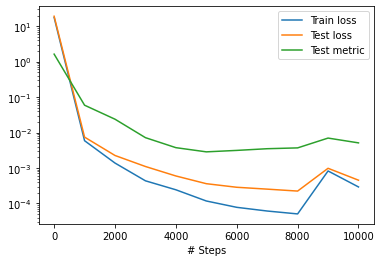

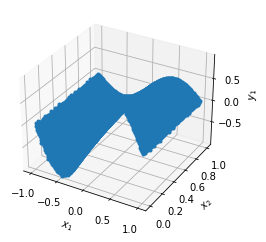

In [2]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, paddle"""
import deepxde as dde
import numpy as np
# Backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf
# Backend pytorch
# import torch
# Backend paddle
# import paddle

# @tf.function
def pde(x, y):
    #dy_t = dde.grad.jacobian(y, x, j=1)
    #dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    dy_t = tf.gradients(y, x)[0][:, 1:2]
    # dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    dy_x = tf.gradients(y, x)[0][:, 0:1]
    dy_xx = tf.gradients(dy_x, x)[0][:, 0:1]
    
    # Backend tensorflow.compat.v1 or tensorflow
    return (
        dy_t
        - dy_xx
        + tf.exp(-x[:, 1:])
        * (tf.sin(np.pi * x[:, 0:1]) - np.pi ** 2 * tf.sin(np.pi * x[:, 0:1]))
    )
    # Backend pytorch
    # return (
    #     dy_t
    #     - dy_xx
    #     + torch.exp(-x[:, 1:])
    #     * (torch.sin(np.pi * x[:, 0:1]) - np.pi ** 2 * torch.sin(np.pi * x[:, 0:1]))
    # )
    

def func(x):
    return np.sin(np.pi * x[:, 0:1]) * np.exp(-x[:, 1:])


geom = dde.geometry.Interval(-1, 1)
timedomain = dde.geometry.TimeDomain(0, 1)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

bc = dde.icbc.DirichletBC(geomtime, func, lambda _, on_boundary: on_boundary)
ic = dde.icbc.IC(geomtime, func, lambda _, on_initial: on_initial)
data = dde.data.TimePDE(
    geomtime,
    pde,
    [bc, ic],
    num_domain=40,
    num_boundary=20,
    num_initial=10,
    solution=func,
    num_test=10000,
)

layer_size = [2] + [32] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)

model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=10000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

# 3. 2D Laplace equation on L-shape domain

In [3]:
import deepxde as dde


def pde(x, u):
    dy_xx = dde.grad.hessian(u, x, i=0, j=0)
    dy_yy = dde.grad.hessian(u, x, i=1, j=1)    
    return -dy_xx - dy_yy - 1


def boundary(_, on_boundary):
    return on_boundary


geom = dde.geometry.Polygon([[0, 0], [1, 0], [1, -1], [-1, -1], [-1, 1], [0, 1]])
bc = dde.icbc.DirichletBC(geom, lambda x: 0, boundary)

data = dde.data.PDE(geom, pde, bc, num_domain=1200, num_boundary=120, num_test=1500)
net = dde.nn.FNN([2] + [50] * 4 + [1], "tanh", "Glorot uniform")
model = dde.Model(data, net)

model.compile("adam", lr=0.001)
model.train(iterations=50000)
model.compile("L-BFGS")
losshistory, train_state = model.train()
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

Compiling model...
Building feed-forward neural network...
'build' took 0.047493 s



/Users/raj/opt/anaconda3/lib/python3.8/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:114: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(
/Users/raj/opt/anaconda3/lib/python3.8/site-packages/keras/legacy_tf_layers/core.py:255: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)


'compile' took 0.420958 s

Initializing variables...
Training model...

Step      Train loss              Test loss               Test metric
0         [1.11e+00, 4.28e-02]    [1.11e+00, 4.28e-02]    []  
1000      [1.91e-04, 2.83e-03]    [1.58e-04, 2.83e-03]    []  
2000      [2.16e-04, 2.82e-03]    [1.67e-04, 2.82e-03]    []  


KeyboardInterrupt: 

# 4. Inverse problem for diffusion equation

Compiling model...
Building feed-forward neural network...
'build' took 0.038868 s

'compile' took 0.344373 s

Initializing variables...
Training model...

0         [1.37e+01, 6.29e-02, 3.81e-01, 7.33e-02][1.59e+01, 6.29e-02, 3.81e-01, 7.33e-02][8.44e-01]
0 [2.00e+00]
1000      [6.56e-03, 2.49e-02, 4.48e-02, 1.72e-02][9.09e-03, 2.49e-02, 4.48e-02, 1.72e-02][3.84e-01]
1000 [1.94e+00]
2000      [2.88e-03, 5.34e-03, 1.19e-02, 6.61e-03][3.83e-03, 5.34e-03, 1.19e-02, 6.61e-03][3.51e-01]
2000 [1.60e+00]
3000      [5.07e-04, 9.87e-04, 1.60e-03, 2.11e-03][1.85e-03, 9.87e-04, 1.60e-03, 2.11e-03][2.05e-01]
3000 [1.27e+00]
4000      [1.70e-04, 1.75e-04, 3.93e-05, 2.28e-04][1.07e-03, 1.75e-04, 3.93e-05, 2.28e-04][6.67e-02]
4000 [1.08e+00]
5000      [1.29e-04, 7.65e-05, 5.66e-06, 3.77e-05][6.33e-04, 7.65e-05, 5.66e-06, 3.77e-05][2.71e-02]
5000 [1.03e+00]
6000      [7.64e-05, 3.55e-05, 2.40e-06, 1.20e-05][4.31e-04, 3.55e-05, 2.40e-06, 1.20e-05][1.51e-02]
6000 [1.02e+00]
7000      [6.07e-05, 1.82e-0

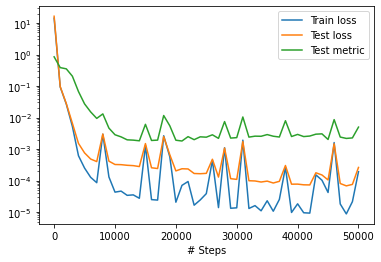

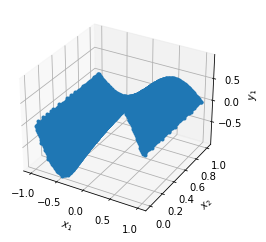

In [9]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, paddle"""
import deepxde as dde
import numpy as np
# Backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf
# Backend pytorch
# import torch
# Backend paddle
# import paddle


C = dde.Variable(2.0)


def pde(x, y):
    dy_t = dde.grad.jacobian(y, x, i=0, j=1)
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    # Backend tensorflow.compat.v1 or tensorflow
    return (
        dy_t
        - C * dy_xx
        + tf.exp(-x[:, 1:])
        * (tf.sin(np.pi * x[:, 0:1]) - np.pi ** 2 * tf.sin(np.pi * x[:, 0:1]))
    )
    # Backend pytorch
    # return (
    #     dy_t
    #     - C * dy_xx
    #     + torch.exp(-x[:, 1:])
    #     * (torch.sin(np.pi * x[:, 0:1]) - np.pi ** 2 * torch.sin(np.pi * x[:, 0:1]))
    # )
   


def func(x):
    return np.sin(np.pi * x[:, 0:1]) * np.exp(-x[:, 1:])


geom = dde.geometry.Interval(-1, 1)
timedomain = dde.geometry.TimeDomain(0, 1)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

bc = dde.icbc.DirichletBC(geomtime, func, lambda _, on_boundary: on_boundary)
ic = dde.icbc.IC(geomtime, func, lambda _, on_initial: on_initial)

observe_x = np.vstack((np.linspace(-1, 1, num=10), np.full((10), 1))).T
observe_y = dde.icbc.PointSetBC(observe_x, func(observe_x), component=0)

data = dde.data.TimePDE(
    geomtime,
    pde,
    [bc, ic, observe_y],
    num_domain=40,
    num_boundary=20,
    num_initial=10,
    anchors=observe_x,
    solution=func,
    num_test=10000,
)

layer_size = [2] + [32] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)

model.compile(
    "adam", lr=0.001, metrics=["l2 relative error"], external_trainable_variables=C
)
variable = dde.callbacks.VariableValue(C, period=1000)
losshistory, train_state = model.train(iterations=50000, callbacks=[variable])

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

# DeepONet for aligned data

Compiling model...
Building DeepONetCartesianProd...
'build' took 0.046908 s

'compile' took 0.199199 s

Initializing variables...


/Users/raj/opt/anaconda3/lib/python3.8/site-packages/deepxde/nn/tensorflow_compat_v1/deeponet.py:312: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  y_func = tf.layers.dense(
/Users/raj/opt/anaconda3/lib/python3.8/site-packages/keras/legacy_tf_layers/core.py:255: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
/Users/raj/opt/anaconda3/lib/python3.8/site-packages/deepxde/nn/tensorflow_compat_v1/deeponet.py:319: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  y_func = tf.layers.dense(
/Users/raj/opt/anaconda3/lib/python3.8/site-packages/deepxde/nn/tensorflow_compat_v1/deeponet.py:331: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  y_

Training model...

Step      Train loss    Test loss     Test metric   
0         [3.11e-01]    [3.09e-01]    [1.13e+00]    
1000      [5.91e-05]    [8.07e-05]    [3.45e-02]    
2000      [2.00e-05]    [4.02e-05]    [2.57e-02]    
3000      [1.08e-05]    [2.80e-05]    [2.20e-02]    
4000      [7.09e-06]    [2.11e-05]    [1.96e-02]    
5000      [5.54e-06]    [1.73e-05]    [1.80e-02]    
6000      [4.58e-06]    [1.46e-05]    [1.66e-02]    
7000      [1.48e-05]    [2.45e-05]    [1.77e-02]    
8000      [3.50e-06]    [1.06e-05]    [1.40e-02]    
9000      [3.96e-06]    [1.07e-05]    [1.34e-02]    
10000     [3.45e-06]    [9.42e-06]    [1.26e-02]    

Best model at step 10000:
  train loss: 3.45e-06
  test loss: 9.42e-06
  test metric: [1.26e-02]

'train' took 6.019973 s



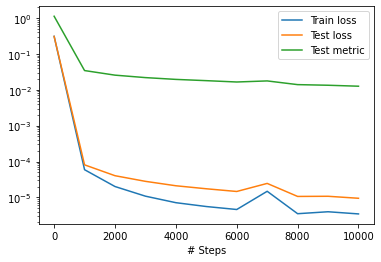

In [10]:
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
d = np.load("/Users/raj/Desktop//antiderivative_aligned_train.npz", allow_pickle=True)
X_train = (d["X"][0].astype(np.float32), d["X"][1].astype(np.float32))
y_train = d["y"].astype(np.float32)
d = np.load("/Users/raj/Desktop//antiderivative_aligned_test.npz", allow_pickle=True)
X_test = (d["X"][0].astype(np.float32), d["X"][1].astype(np.float32))
y_test = d["y"].astype(np.float32)

data = dde.data.TripleCartesianProd(
    X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test
)

# Choose a network
m = 100
dim_x = 1
net = dde.nn.DeepONetCartesianProd(
    [m, 40, 40],
    [dim_x, 40, 40],
    "relu",
    "Glorot normal",
)

# Define a Model
model = dde.Model(data, net)

# Compile and Train
model.compile("adam", lr=0.001, metrics=["mean l2 relative error"])
losshistory, train_state = model.train(iterations=10000)

# Plot the loss trajectory
dde.utils.plot_loss_history(losshistory)
plt.show()

# DeepoNet Unaligned data

In [11]:
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
d = np.load("/Users/raj/Desktop/antiderivative_unaligned_train.npz", allow_pickle=True)
X_train = (d["X_train0"].astype(np.float32), d["X_train1"].astype(np.float32))
y_train = d["y_train"].astype(np.float32)


d = np.load("/Users/raj/Desktop//antiderivative_unaligned_test.npz", allow_pickle=True)
X_test = (d["X_test0"].astype(np.float32), d["X_test1"].astype(np.float32))
y_test = d["y_test"].astype(np.float32)

data = dde.data.Triple(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

# Choose a network
m = 100
dim_x = 1
net = dde.nn.DeepONet(
    [m, 40, 40],
    [dim_x, 40, 40],
    "relu",
    "Glorot normal",
)

# Define a Model
model = dde.Model(data, net)

# Compile and Train
model.compile("adam", lr=0.001)
losshistory, train_state = model.train(iterations=10000)

# Plot the loss trajectory
dde.utils.plot_loss_history(losshistory)
plt.show()

Compiling model...
Building DeepONet...
'build' took 0.039756 s



/Users/raj/opt/anaconda3/lib/python3.8/site-packages/deepxde/nn/tensorflow_compat_v1/deeponet.py:187: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(
/Users/raj/opt/anaconda3/lib/python3.8/site-packages/keras/legacy_tf_layers/core.py:255: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)


'compile' took 0.213874 s

Initializing variables...
Training model...

Step      Train loss    Test loss     Test metric
0         [9.87e-02]    [9.92e-02]    []  


KeyboardInterrupt: 

In [6]:
np.linspace(-1, 1, num=10)


array([-1.        , -0.77777778, -0.55555556, -0.33333333, -0.11111111,
        0.11111111,  0.33333333,  0.55555556,  0.77777778,  1.        ])

In [8]:

np.full((10), 1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
y_train = d["y_train"].astype(np.float32)

KeyError: 'y_train is not a file in the archive'

In [ ]:
y_train = d["y_train"].astype(np.float32)
